In [1]:
#library import

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

This dataset only had data from the 1930-2018 World Cup, I inserted the missing data from the 2022 World Cup manually to perform a complete analysis.


In [2]:
#dataset import https://www.kaggle.com/datasets/abhijitdahatonde/fifa-world-cup-all-dataset

editions = pd.read_excel('WorldCupEditions.xlsx', engine='openpyxl')
matches = pd.read_excel('WorldCupMatches.xlsx', engine='openpyxl')

In [3]:
print(editions.head())

   Year Host Country      Winner      Runners-Up    Third      Fourth  \
0  1930      Uruguay     Uruguay       Argentina      USA  Yugoslavia   
1  1934        Italy       Italy  Czechoslovakia  Germany     Austria   
2  1938       France       Italy         Hungary   Brazil      Sweden   
3  1950       Brazil     Uruguay          Brazil   Sweden       Spain   
4  1954  Switzerland  Germany FR         Hungary  Austria     Uruguay   

   Goals Scored  Matches Played  Qualified Teams  
0            70              18               13  
1            70              17               16  
2            84              18               15  
3            88              22               13  
4           140              26               16  


In [4]:
print(matches.head())

   ID  Year        Stage      Home Team  Home Goals  Away Goals Away Team  \
0   1  1930  Group stage         France           4           1    Mexico   
1   2  1930  Group stage  United States           3           0   Belgium   
2   3  1930  Group stage     Yugoslavia           2           1    Brazil   
3   4  1930  Group stage        Romania           3           1      Peru   
4   5  1930  Group stage      Argentina           1           0    France   

   Host Team or Not         Winner  Sum Goals  Host Team Win  
0                 0         France          5              0  
1                 0  United States          3              0  
2                 0     Yugoslavia          3              0  
3                 0        Romania          4              0  
4                 0      Argentina          1              0  


In [5]:
#colunm name adjust

matches = matches.rename(columns={"ID":"id", "Year": "year", "Stage": "stage", "Home Team": "home_team", "Home Goals": "home_goals", "Away Team": "away_team", "Away Goals": "away_goals", "Host Team or Not": "host_team", "Winner":"winner", "Sum Goals": "sum_goals", "Host Team Win":"host_win"})

editions = editions.rename(columns={"Year": "year","Host Country":"host", "Winner":"winner", "Runners-Up":"runner_up", "Third":"third","Fourth":"fourth","Goals Scored":"goals","Matches Played":"matches_played","Qualified Teams":"qualified_teams"})



In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          964 non-null    int64 
 1   year        964 non-null    int64 
 2   stage       964 non-null    object
 3   home_team   964 non-null    object
 4   home_goals  964 non-null    int64 
 5   away_goals  964 non-null    int64 
 6   away_team   964 non-null    object
 7   host_team   964 non-null    int64 
 8   winner      964 non-null    object
 9   sum_goals   964 non-null    int64 
 10  host_win    964 non-null    int64 
dtypes: int64(7), object(4)
memory usage: 83.0+ KB


In [7]:
editions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             22 non-null     int64 
 1   host             22 non-null     object
 2   winner           22 non-null     object
 3   runner_up        22 non-null     object
 4   third            22 non-null     object
 5   fourth           22 non-null     object
 6   goals            22 non-null     int64 
 7   matches_played   22 non-null     int64 
 8   qualified_teams  22 non-null     int64 
dtypes: int64(4), object(5)
memory usage: 1.7+ KB


In [8]:
# replacing 'Germany FR' with 'Germany'
editions = editions.replace('Germany FR', 'Germany')

#Beginning of the Exploratory Analyzes.

1. Number of goals per World Cup Edition

In [9]:
#selecting goals and group them by Year

goals_per_edition = editions.groupby('year')['goals'].sum()

goals_per_edition

,goals
year,
1930,70
1934,70
1938,84
1950,88
1954,140
1958,126
1962,89
1966,89
1970,95


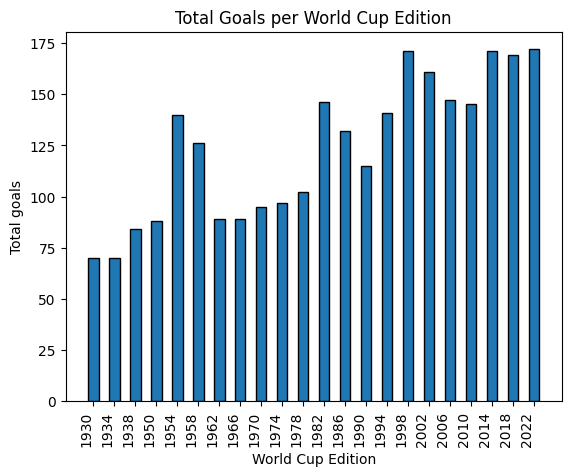

In [10]:
#plotting Goals x World Cup Edition

goals_per_edition.index = goals_per_edition.index.astype(str)
plt.bar(goals_per_edition.index, goals_per_edition.values, width=0.5,edgecolor="black")



plt.xlabel('World Cup Edition')
plt.ylabel('Total goals')
plt.title('Total Goals per World Cup Edition')
plt.xticks(rotation=90, ha='right')

plt.show()

2. Average Goals per Game

In [11]:
#Selecting the average of goals per game.

avg_goals_per_game = matches.groupby('year')[['home_goals', 'away_goals']].mean()

avg_goals_per_game['goals'] = avg_goals_per_game['home_goals'] + avg_goals_per_game['away_goals']

avg_goals_per_game

,home_goals,away_goals,goals
year,,,
1930,3.277778,0.611111,3.888889
1934,2.823529,1.294118,4.117647
1938,3.277778,1.388889,4.666667
1950,3.136364,0.863636,4.000000
1954,4.038462,1.346154,5.384615
1958,2.428571,1.171429,3.600000
1962,2.031250,0.750000,2.781250
1966,2.156250,0.625000,2.781250
1970,2.156250,0.812500,2.968750


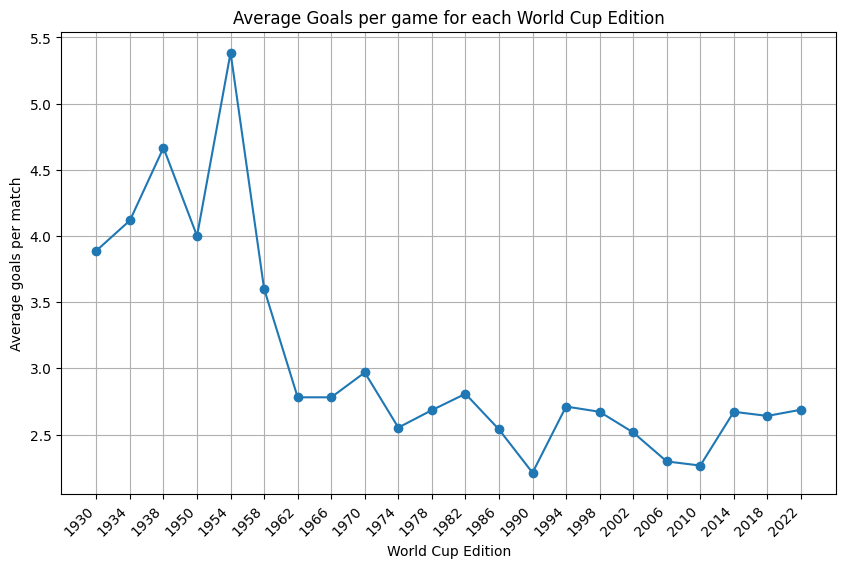

In [12]:
# Calculating the average of goals per match for each WC edition.

avg_goals_per_year = matches.groupby('year')[['home_goals', 'away_goals']].mean().reset_index()
avg_goals_per_year['total_goals'] = avg_goals_per_year['home_goals'] + avg_goals_per_year['away_goals']

avg_goals_per_year['year'] = avg_goals_per_year['year'].astype(str)

plt.figure(figsize=(10, 6))
plt.plot(avg_goals_per_year['year'], avg_goals_per_year['total_goals'], marker='o', linestyle='-')

plt.xlabel('World Cup Edition')
plt.ylabel('Average goals per match')
plt.title('Average Goals per game for each World Cup Edition')
plt.grid(True)
plt.xticks(rotation=45, ha='right')

plt.show()

3. World Cup Titles Per Country

In [13]:
#WC Title Count by Countries

winner_counts = editions.groupby('winner')['winner'].count().sort_values(ascending=False)
winner_counts

,winner
winner,
Brazil,5
Germany,4
Italy,4
Argentina,3
France,2
Uruguay,2
England,1
Spain,1


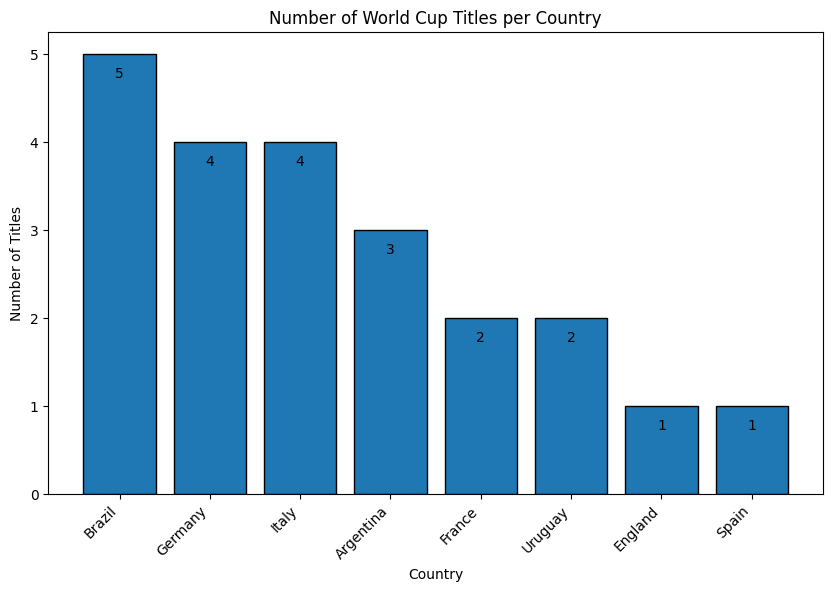

In [14]:
#Plotting Number of Wins x Country

plt.figure(figsize=(10, 6))
plt.bar(winner_counts.index, winner_counts.values, edgecolor='black')

plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.title('Number of World Cup Titles per Country')
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(winner_counts.values):
    plt.text(i, v-0.3, str(v), ha='center', va='bottom')

plt.show()

4. Counting Finals per Country

In [15]:
# merging Winner and Runner_up records to find out how many times each team participated in a World Cup final
finalists = pd.concat([editions['winner'], editions['runner_up']])

final_counts = finalists.value_counts()

final_counts

,count
Germany,8
Brazil,7
Italy,6
Argentina,6
France,4
Netherlands,3
Uruguay,2
Czechoslovakia,2
Hungary,2
England,1


5. Finding the percentage of Success for each Country that play a World Cup Final.

In [16]:
# calculating the percentage of success of each team that reached the world cup final

final_counts_with_percentage = final_counts.to_frame(name='Finals')

final_counts_with_percentage['% Success'] = ((winner_counts / final_counts_with_percentage['Finals']) * 100).round(2).fillna(0)

print(final_counts_with_percentage)

                Finals  % Success
Germany              8      50.00
Brazil               7      71.43
Italy                6      66.67
Argentina            6      50.00
France               4      50.00
Netherlands          3       0.00
Uruguay              2     100.00
Czechoslovakia       2       0.00
Hungary              2       0.00
England              1     100.00
Spain                1     100.00
Sweden               1       0.00
Croatia              1       0.00


<ipython-input-17-8aa6502e63f0>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(countries, rotation=45, ha='right')
<ipython-input-17-8aa6502e63f0>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(countries, rotation=45, ha='right')


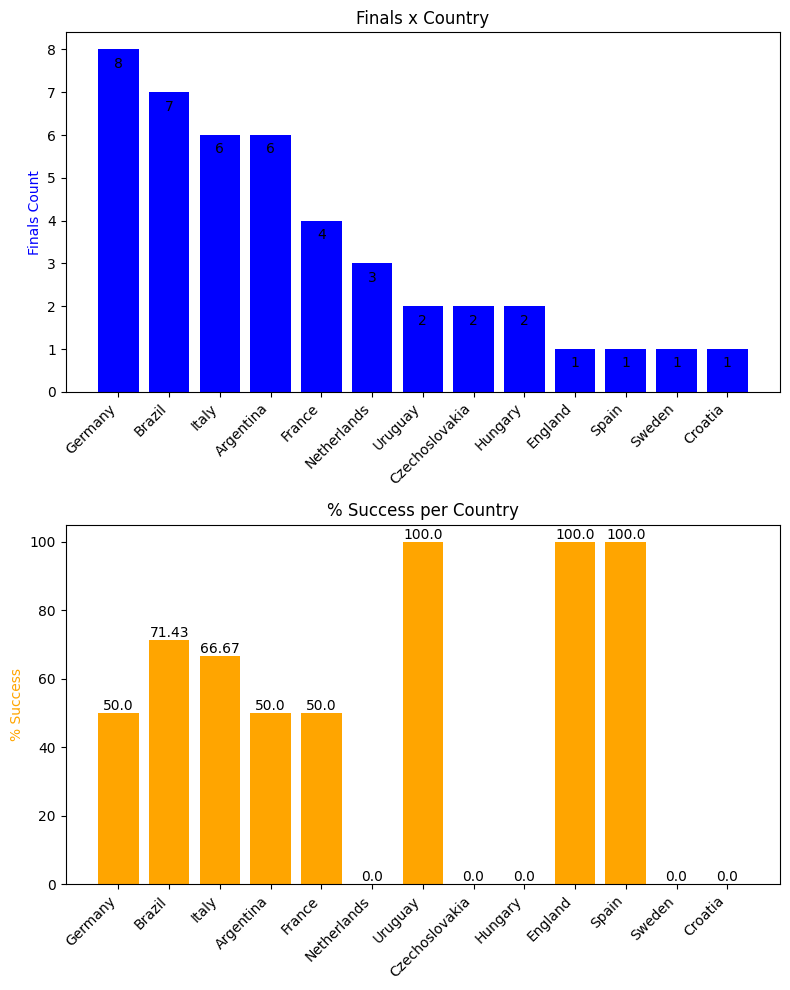

In [17]:
# Plotting the teams that reached the World Cup finals.
# Plotting the percentage of success.

countries = final_counts_with_percentage.index
finals = final_counts_with_percentage['Finals']
success = final_counts_with_percentage['% Success']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

ax1.bar(countries, finals, color='blue')
ax1.set_ylabel('Finals Count', color='blue')
ax1.set_title('Finals x Country')
ax1.set_xticklabels(countries, rotation=45, ha='right')
for i, v in enumerate(finals):
    ax1.text(i, v-0.5, str(v), ha='center', va='bottom')

ax2.bar(countries, success, color='orange')
ax2.set_ylabel('% Success', color='orange')
ax2.set_title('% Success per Country')
ax2.set_xticklabels(countries, rotation=45, ha='right')
for i, v in enumerate(success):
    ax2.text(i, v, str(v), ha='center', va='bottom')

fig.tight_layout()

plt.show()